In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
 


C:\Users\Administrator\AppData\Local\Temp\ipykernel_33416\3094990426.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                           Temperature (C)
Hours                                     
2006-03-31 22:00:00+00:00             9.47
2006-03-31 23:00:00+00:00             9.36
2006-04-01 00:00:00+00:00             9.38
2006-04-01 01:00:00+00:00             8.29
2006-04-01 02:00:00+00:00             8.76


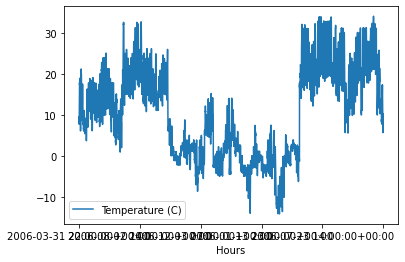

In [2]:

dataset = pd.read_excel('newUpdate.xlsx').drop(['Humidity', 'Pressure (millibars)', 'Daily Summary'], axis=1)

indexedDataset = dataset.set_index(['Hours'])

 
series = indexedDataset
print(series.head())
series.plot()
plt.show()

predicted=-6.885721, expected=-7.170000
predicted=-6.513204, expected=-7.080000
predicted=-6.954222, expected=-5.930000
predicted=-5.938936, expected=-4.950000
predicted=-4.705745, expected=-5.990000
predicted=-5.773697, expected=-6.940000
predicted=-7.135464, expected=-7.730000
predicted=-8.180225, expected=-7.820000
predicted=-8.119949, expected=-8.870000
predicted=-8.990013, expected=-9.000000
predicted=-9.166440, expected=-9.510000
predicted=-9.658243, expected=-10.560000
predicted=-10.730276, expected=-10.650000
predicted=-10.872784, expected=-10.180000
predicted=-10.267443, expected=-10.370000
predicted=-10.253389, expected=-10.740000
predicted=-10.698355, expected=-10.740000
predicted=-10.842171, expected=-10.870000
predicted=-10.942037, expected=-11.320000
predicted=-11.363216, expected=-12.320000
predicted=-12.484266, expected=-12.380000
predicted=-12.634044, expected=-10.210000
predicted=-10.155556, expected=-8.910000
predicted=-8.340253, expected=-7.300000
predicted=-6.61164

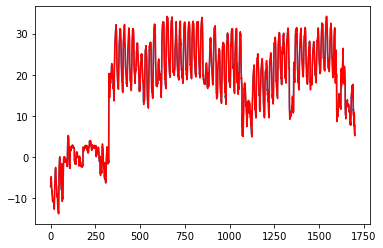

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
